In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#__IMPORTAMOS NUESTRO ARCHIVO CSV__Y LO CONVERTIMOS EN UN DATAFRAME__
df01=pd.read_csv(r"C:\Users\jesus\Documents\data scince\github\properatti.csv" ,delimiter=",")
pd.set_option('display.max_columns', None)
df01=df01.drop(["Unnamed: 0"], axis=1)

In [3]:
df01.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
# Borramos las columnas que no vamos a comparar con el otro proyecto
df=df01.drop(["property_type", "operation", "state_name", "geonames_id", "place_name", "country_name", "place_with_parent_names", "price", "lat-lon", "lat", "lon", "price_aprox_local_currency", "surface_total_in_m2", "price_per_m2", "currency", "image_thumbnail", "price_usd_per_m2", "description", "title", "properati_url", "expenses"], axis=1)

In [5]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,62000.0,40.0,NaN,NaN
1,150000.0,NaN,NaN,NaN
2,72000.0,55.0,NaN,NaN
3,95000.0,NaN,NaN,NaN
4,64000.0,35.0,NaN,NaN
...,...,...,...,...
121215,870000.0,93.0,NaN,NaN
121216,498000.0,360.0,NaN,NaN
121217,131500.0,39.0,NaN,NaN
121218,95900.0,48.0,NaN,NaN


In [6]:
#Eliminamos los nan para ver los datos que nos interesan
df = df.dropna(axis = 0)

In [7]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
89,50000.0,53.0,1.0,1.0
93,385000.0,416.0,2.0,3.0
94,135000.0,95.0,2.0,3.0
95,75000.0,180.0,1.0,1.0
96,54000.0,30.0,3.0,2.0
...,...,...,...,...
119929,75000.0,23.0,7.0,1.0
119930,170000.0,63.0,2.0,3.0
119935,95000.0,12731.0,1.0,10.0
119936,267000.0,82.0,1.0,4.0


In [8]:
# hacemos un reseset en los index
df = df.reset_index(drop=True)

In [9]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,50000.0,53.0,1.0,1.0
1,385000.0,416.0,2.0,3.0
2,135000.0,95.0,2.0,3.0
3,75000.0,180.0,1.0,1.0
4,54000.0,30.0,3.0,2.0
...,...,...,...,...
4505,75000.0,23.0,7.0,1.0
4506,170000.0,63.0,2.0,3.0
4507,95000.0,12731.0,1.0,10.0
4508,267000.0,82.0,1.0,4.0


In [10]:
# Hacemos un describe en el dataframe para ver localizar outlierts 
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.510000e+03,4510.000000,4510.000000,4510.000000
mean,2.281335e+05,110.444124,25.580931,2.662306
std,3.289798e+05,425.448592,148.305896,1.308373
min,5.047530e+03,5.000000,1.000000,1.000000
25%,8.580000e+04,42.000000,1.000000,2.000000
50%,1.300000e+05,60.000000,3.000000,3.000000
75%,2.174756e+05,100.000000,6.000000,3.000000
max,3.900000e+06,12731.000000,2509.000000,22.000000


In [11]:
# Calculamos el percentil del 99%
q = df["surface_covered_in_m2"].quantile(0.99)
print(q)

459.09999999999854


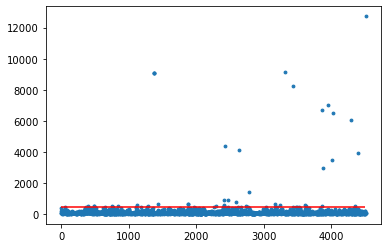

In [12]:
# Dibujamos el percentil del 9% en metros
plt.scatter(df.index, df["surface_covered_in_m2"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

In [13]:
# Mostramos los pisos de metros umbral (threshold) que marca el percentil del 98%
q = df["surface_covered_in_m2"].quantile(0.98)
print(q)

# Eliminamos del dataframe los metros que esten por encima del percentil del 98% (criterio de filtrado)
df = df[df["surface_covered_in_m2"] < q]

# hacemos un values_counts para visualizar los datos que hay en la columna Metros
df['surface_covered_in_m2'].value_counts()

378.6399999999994


40.0     151
45.0     133
50.0     108
60.0      94
38.0      91
        ... 
255.0      1
281.0      1
375.0      1
275.0      1
219.0      1
Name: surface_covered_in_m2, Length: 271, dtype: int64

In [14]:
# Calculamos el percentil del 98%
q = df["floor"].quantile(0.98)
print(q)

312.6400000000003


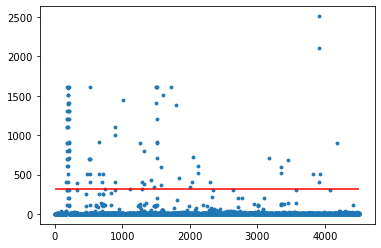

In [15]:
# Dibujamos el percentil del 98% en FLOOR
plt.scatter(df.index, df["floor"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

In [16]:
# Mostramos los pisos de floor umbral (threshold) que marca el percentil del 98%
q = df["floor"].quantile(0.98)
print(q)

# Eliminamos del dataframe los pisos que esten por encima del percentil del 98% (criterio de filtrado)
df = df[df["floor"] < q]

# hacemos un values_counts para visualizar los datos que hay en la columna FLOOR
df['floor'].value_counts()

312.6400000000003


1.0      1151
2.0       894
3.0       464
4.0       335
5.0       274
         ... 
44.0        1
45.0        1
181.0       1
56.0        1
26.0        1
Name: floor, Length: 100, dtype: int64

In [17]:
# vemos el describe del dataframe para ver los valores, si sigue valores atipicos o no
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.330000e+03,4330.000000,4330.000000,4330.000000
mean,2.226043e+05,81.088684,7.056120,2.610162
std,3.283069e+05,62.244601,22.850197,1.208841
min,5.047530e+03,5.000000,1.000000,1.000000
25%,8.500000e+04,42.000000,1.000000,2.000000
50%,1.290000e+05,60.000000,3.000000,3.000000
75%,2.090000e+05,96.000000,6.000000,3.000000
max,3.900000e+06,377.000000,312.000000,22.000000


In [18]:
# Calculamos el percentil del 99% de la columan PRECIO
q = df["price_aprox_usd"].quantile(0.99)
print(q)

1800000.0


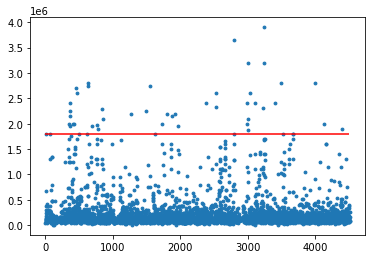

In [19]:
# Dibujamos el percentil del 99% en el precio
plt.scatter(df.index, df["price_aprox_usd"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

# vemos que no hay datos atipicos superiores

In [20]:
# Calculamos el percentil del 1% de la columan PRECIO
q = df["price_aprox_usd"].quantile(0.01)
print(q)

39000.0


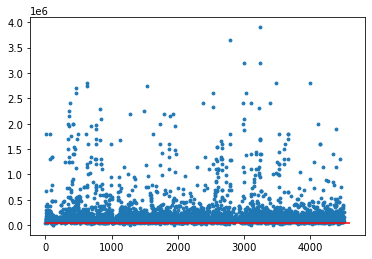

In [21]:
# Dibujamos el percentil del 1% en Precios
plt.scatter(df.index, df["price_aprox_usd"], s=8)
plt.hlines(y=q, xmin=0, xmax=4600, colors='red')
plt.show()

In [22]:
# Mostramos los precios umbral (threshold) que marca el percentil del 1%
q = df["price_aprox_usd"].quantile(0.01)
print(q)

# Eliminamos del dataframe los pisos que esten por debajo del percentil del 1% (criterio de filtrado)
df = df[df["price_aprox_usd"] > q]

# hacemos un values_counts para visualizar los datos que hay en la columna price
df['price_aprox_usd'].value_counts()

39000.0


75000.00      71
85000.00      71
130000.00     69
120000.00     68
125000.00     65
              ..
1182800.00     1
85360.42       1
115900.00      1
115600.00      1
299999.00      1
Name: price_aprox_usd, Length: 926, dtype: int64

In [23]:
# hacemos un describe y vemos que el min de la columna price cambio
# osea eliminamos el outliers minimo que habian
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.285000e+03,4285.000000,4285.000000,4285.000000
mean,2.246397e+05,81.494749,7.070712,2.612835
std,3.294207e+05,62.401742,22.948047,1.205989
min,3.914640e+04,5.000000,1.000000,1.000000
25%,8.600000e+04,42.000000,1.000000,2.000000
50%,1.300000e+05,60.000000,3.000000,3.000000
75%,2.100000e+05,96.000000,6.000000,3.000000
max,3.900000e+06,377.000000,312.000000,22.000000


In [24]:
# Calculamos el percentil del 99% de la columan rooms
q = df["rooms"].quantile(0.99)
print(q)

6.0


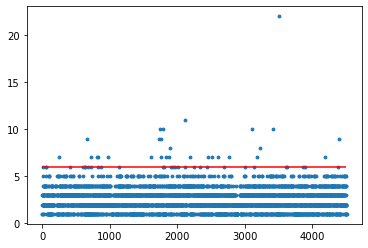

In [25]:
# Dibujamos el percentil del 99% en el precio
plt.scatter(df.index, df["rooms"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

In [26]:
# visualizamos los datos a tipicos, si tienen o no coherencia
# Position of the Outlier
print(np.where((df['rooms'] > 7 )))

(array([ 595, 1612, 1633, 1644, 1676, 1767, 1979, 2942, 3044, 3240, 3326,
       4171], dtype=int64),)


In [27]:
df.loc[595]

price_aprox_usd          75000.0
surface_covered_in_m2       60.0
floor                        4.0
rooms                        3.0
Name: 595, dtype: float64

In [28]:
df['rooms'].value_counts()

2.0     1420
3.0     1302
1.0      714
4.0      636
5.0      155
6.0       30
7.0       16
9.0        4
10.0       4
8.0        2
11.0       1
22.0       1
Name: rooms, dtype: int64

In [29]:
# Mostramos las habitaciones umbral (threshold) que marca el percentil del 99%
q = df["rooms"].quantile(0.99)
print(q)

# Eliminamos del dataframe las habitaciones que esten por encima del percentil del 99% (criterio de filtrado)
df = df[df["rooms"] < q]

# hacemos un values_counts para visualizar los datos que hay en la columna rooms
df['rooms'].value_counts()

6.0


2.0    1420
3.0    1302
1.0     714
4.0     636
5.0     155
Name: rooms, dtype: int64

In [30]:
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.227000e+03,4227.000000,4227.000000,4227.000000
mean,2.217128e+05,79.843861,7.017033,2.550035
std,3.279349e+05,60.323169,22.712825,1.051914
min,3.914640e+04,5.000000,1.000000,1.000000
25%,8.500000e+04,42.000000,1.000000,2.000000
50%,1.290000e+05,60.000000,3.000000,2.000000
75%,2.000000e+05,94.000000,6.000000,3.000000
max,3.900000e+06,374.000000,312.000000,5.000000


In [31]:
# Position of the Outlier
print(np.where((df['price_aprox_usd'] < 15000)))

(array([], dtype=int64),)


In [32]:
df.loc[3279]

price_aprox_usd          82000.0
surface_covered_in_m2       34.0
floor                       11.0
rooms                        1.0
Name: 3279, dtype: float64

In [33]:
df.head(5)

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,50000.0,53.0,1.0,1.0
2,135000.0,95.0,2.0,3.0
3,75000.0,180.0,1.0,1.0
4,54000.0,30.0,3.0,2.0
6,185000.0,100.0,1.0,3.0


Llamamos el csv del proyecto nuevo para empezar la comparacion de regresiones 

In [34]:
# mostramos el dataframe 
dfArgenenprop=pd.read_csv("ArchivoGrandeArgenprop.csv",delimiter=",")
pd.set_option('display.max_columns', None)
dfArgenenprop

,price,metrosCubiertos,dormitorios,antiguedad,toilets
0,85000,35,1,40,1
1,288000,140,2,10,2
2,330000,75,2,2,3
3,215000,95,3,40,2
4,295000,165,4,40,4
...,...,...,...,...,...
1859,150000,42,1,1,2
1860,86000,28,0,0,1
1861,115000,164,3,60,2
1862,358000,110,3,27,2


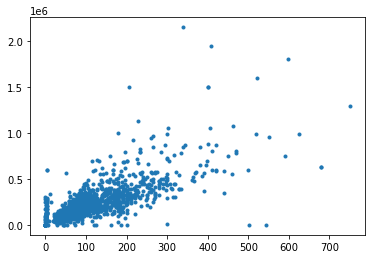

In [35]:
# vemos un grafico de las columnas metrosCubiertos y precio del df nuevo
plt.plot(dfArgenenprop["metrosCubiertos"],dfArgenenprop["price"], '.')

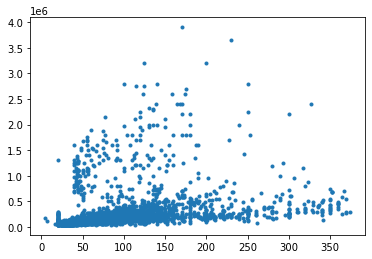

In [36]:
# vemos un grafico de las columnas metrosCubiertos y precio del df antiguo 
plt.plot(df["surface_covered_in_m2"],df["price_aprox_usd"], '.')

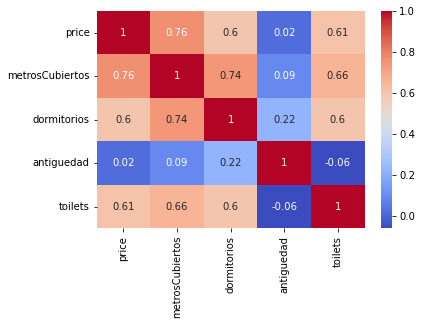

In [37]:
# hacemos una matrix de correlacion del df nuevo
corrMatrix=dfArgenenprop.corr().round(2)
sns.heatmap(corrMatrix, annot= True,cmap="coolwarm")
plt.show()

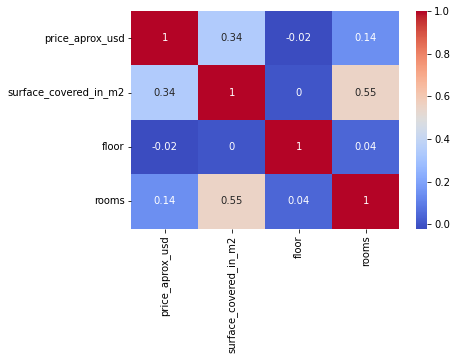

In [38]:
# hacemos una matrix de correlacion del df antiguo
corrMatrix=df.corr().round(2)
sns.heatmap(corrMatrix, annot= True,cmap="coolwarm")
plt.show()

In [39]:
# Prueba esta fórmula de regresión lineal
from scipy import stats
import matplotlib.pyplot as plt

In [40]:
# empezamos con el df nuevo la regresion lineal
x1 = dfArgenenprop["metrosCubiertos"]
y1 = dfArgenenprop["price"]

In [41]:
res = stats.linregress(x1, y1)

In [42]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.581000


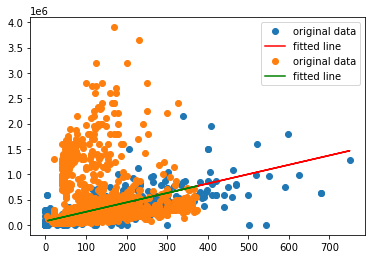

In [49]:
# hacemos un grafico para comparar nuestros dataframe
plt.plot(x1, y1, 'o', label='original data')
plt.plot(x1, res.intercept + res.slope*x1, 'r', label='fitted line')

plt.plot(x2, y2, 'o', label='original data')
plt.plot(x2, res.intercept + res.slope*x2, 'g', label='fitted line')
plt.legend()
plt.show()

In [44]:
# empezamos con el df antiguo la regresion lineal
x2 = df["surface_covered_in_m2"]
y2 = df["price_aprox_usd"]

In [45]:
res = stats.linregress(x2, y2)

In [46]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.116327


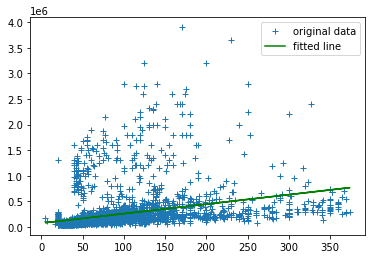

In [50]:
plt.plot(x2, y2, '+', label='original data')
plt.plot(x2, res.intercept + res.slope*x2, 'g', label='fitted line')
plt.legend()
plt.show()

vamos hacer la regresion lineal con otro metodo

In [51]:
# Creamos X e y del df nuevo
X = dfArgenenprop[["metrosCubiertos"]]
y = dfArgenenprop[["price"]]

In [52]:
type(y)

pandas.core.frame.DataFrame

In [53]:
X.shape

(1864, 1)

In [54]:
y.shape

(1864, 1)

In [55]:
# Instanciamos el modelo

linreg = LinearRegression()

In [56]:
# Entrenamos el modelo 

linreg.fit(X, y)

LinearRegression()

In [57]:
# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

[42584.23720818]
[[1634.36389796]]


In [58]:
# Aplicando la fórmula manualmente

test = 25

linreg.intercept_ + linreg.coef_*test

array([[83443.33465707]])

In [59]:
# Generamos las matrices y el target

X = dfArgenenprop[["metrosCubiertos","dormitorios"]]
y = dfArgenenprop["price"]

# Importamos, Instanciamos, Fiteamos, etc..

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   32271.461739566614
RM=   [ 1521.46959125 10498.58813207]
R2_train=   0.5832643667627428


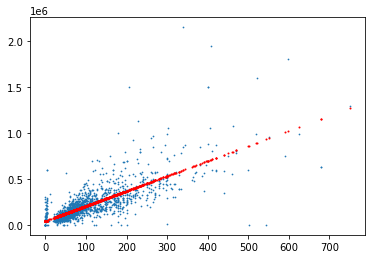

In [60]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
# y = b + m * x
b, m = polyfit(dfArgenenprop["metrosCubiertos"],dfArgenenprop["price"], 1)

plt.scatter(dfArgenenprop["metrosCubiertos"], dfArgenenprop["price"], s=0.5)
plt.scatter(dfArgenenprop["metrosCubiertos"], b + m * dfArgenenprop["metrosCubiertos"], s=1, color="red")

In [61]:
# Creamos X e y con el dataframe ANTIGUO
X2 = df[["surface_covered_in_m2"]]
y2 = df[["price_aprox_usd"]]

In [62]:
# Instanciamos el modelo

linreg = LinearRegression()

In [63]:
# Entrenamos el modelo 

linreg.fit(X2, y2)

LinearRegression()

In [64]:
# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

[73670.82580268]
[[1854.14303998]]


In [65]:
# Aplicando la fórmula manualmente

test = 25

linreg.intercept_ + linreg.coef_*test

array([[120024.40180209]])

In [66]:
# Generamos las matrices y el target

X2 = df[["surface_covered_in_m2","rooms"]]
y2 = df["price_aprox_usd"]

# Importamos, Instanciamos, Fiteamos, etc..

lm = linear_model.LinearRegression()

model = lm.fit(X2, y2)
predictions = lm.predict(X2)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X2, y2))

Intercepto=   109195.47908831714
RM=   [  2045.76453289 -19930.88072141]
R2_train=   0.1191715905276477


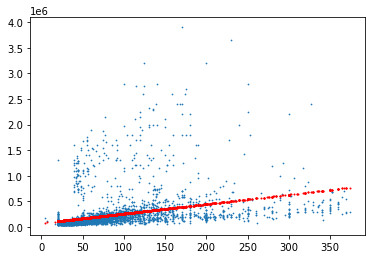

In [67]:
# y = b + m * x
b, m = polyfit(df["surface_covered_in_m2"],df["price_aprox_usd"], 1)

plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"], s=0.5)
plt.scatter(df["surface_covered_in_m2"], b + m * df["surface_covered_in_m2"], s=1, color="red")

In [140]:
def prediccion(n):
    slope = linreg.coef_
    intercept = linreg.intercept_
    precio = intercept + slope * n
    if precio > 250000:
        print("dependiendo de la zona sabremos si su piso es o no de lujo")
        if n < 100:
            print("su piso es de lujo")
        else:
            print("su piso NO es de lujo")
    else:
        print("NO es de LUJO")
    
    return(precio)

In [141]:
prediccionPrecio1 = prediccion(200)
prediccionPrecio1

dependiendo de la zona sabremos si su piso es o no de lujo
su piso NO es de lujo


array([[444499.43379799]])

In [142]:
prediccionPrecio2 = prediccion(60)
prediccionPrecio2

NO es de LUJO


array([[184919.40820127]])

In [143]:
prediccionPrecio3 = prediccion(150)
prediccionPrecio3

dependiendo de la zona sabremos si su piso es o no de lujo
su piso NO es de lujo


array([[351792.28179916]])

In [144]:
prediccionPrecio4 = prediccion(120)
prediccionPrecio4

dependiendo de la zona sabremos si su piso es o no de lujo
su piso NO es de lujo


array([[296167.99059986]])

In [145]:
prediccionPrecio5 = prediccion(270)
prediccionPrecio5

dependiendo de la zona sabremos si su piso es o no de lujo
su piso NO es de lujo


array([[574289.44659634]])

In [146]:
prediccionPrecio6 = prediccion(50)
prediccionPrecio6

NO es de LUJO


array([[166377.9778015]])

In [147]:
prediccionPrecio7 = prediccion(72)
prediccionPrecio7

NO es de LUJO


array([[207169.12468099]])

In [148]:
prediccionPrecio8 = prediccion(300)
prediccionPrecio8

dependiendo de la zona sabremos si su piso es o no de lujo
su piso NO es de lujo


array([[629913.73779564]])

In [149]:
prediccionPrecio9 = prediccion(36)
prediccionPrecio9

NO es de LUJO


array([[140419.97524183]])

In [150]:
prediccionPrecio10 = prediccion(235)
prediccionPrecio10

dependiendo de la zona sabremos si su piso es o no de lujo
su piso NO es de lujo


array([[509394.44019717]])

In [100]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,50000.0,53.0,1.0,1.0
2,135000.0,95.0,2.0,3.0
3,75000.0,180.0,1.0,1.0
4,54000.0,30.0,3.0,2.0
6,185000.0,100.0,1.0,3.0
...,...,...,...,...
4504,380000.0,162.0,7.0,5.0
4505,75000.0,23.0,7.0,1.0
4506,170000.0,63.0,2.0,3.0
4508,267000.0,82.0,1.0,4.0


In [80]:
print(df.loc[2])

price_aprox_usd          135000.0
surface_covered_in_m2        95.0
floor                         2.0
rooms                         3.0
Name: 2, dtype: float64


In [81]:
prediccionPrecio10 = prediccion(df.loc[2].surface_covered_in_m2)
prediccionPrecio10 

su piso NO es de lujo


array([[249814.41460045]])

In [82]:
errorDePrediccion = prediccionPrecio10 - df.price_aprox_usd[2]

In [83]:
errorDePrediccion

array([[114814.41460045]])

In [ ]:
def errores():
    listaError = []
    